<a href="https://colab.research.google.com/github/VivekGangurde94/Mlproject/blob/main/Loan_Prediction_using%20Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Prediction using ANN

In [31]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
# importing algorithm & data split feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
# importing evaluation metrices for the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score

In [32]:
data_path='/content/sample_data'
os.getcwd()

os.listdir(data_path)

['README.md',
 'anscombe.json',
 'Loan Prediction Dataset (1).csv',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv']

In [33]:
loan_data=pd.read_csv('/content/sample_data/Loan Prediction Dataset (1).csv')
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
from sklearn.impute import KNNImputer

In [35]:

loan_data['Married']=loan_data['Married'].fillna('Yes')
loan_data['Dependents']=loan_data['Dependents'].fillna(0)
loan_data['Self_Employed']=loan_data['Self_Employed'].fillna('No')
loan_data['Loan_Amount_Term']=loan_data['Loan_Amount_Term'].fillna(360.0)
loan_data['Credit_History']=loan_data['Credit_History'].fillna(1.0)
loan_data['Gender']=loan_data['Gender'].fillna('Male')

In [36]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
df_loan = loan_data.copy(deep=True)

In [38]:
knn_imputer= KNNImputer(n_neighbors=3,weights='distance')
df_loan.loc[:,['ApplicantIncome','LoanAmount']]=knn_imputer.fit_transform(df_loan.loc[:,['ApplicantIncome','LoanAmount']])

<ipython-input-38-d7afb887afc7>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_loan.loc[:,['ApplicantIncome','LoanAmount']]=knn_imputer.fit_transform(df_loan.loc[:,['ApplicantIncome','LoanAmount']])


In [39]:
df_loan.loc[:,['ApplicantIncome','LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849.0,134.76
1,4583.0,128.00
2,3000.0,66.00
3,2583.0,120.00
4,6000.0,141.00
...,...,...
609,2900.0,71.00
610,4106.0,40.00
611,8072.0,253.00
612,7583.0,187.00


In [40]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,134.76,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.00,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.00,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.00,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.00,360.0,1.0,Urban,Y


In [41]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [43]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.00000,614.000000,614.000000
mean,5403.459283,1621.245798,146.30470,342.410423,0.855049
std,6109.041673,2926.248369,85.74174,64.428629,0.352339
min,150.000000,0.000000,9.00000,12.000000,0.000000
25%,2877.500000,0.000000,100.00000,360.000000,1.000000
50%,3812.500000,1188.500000,127.50000,360.000000,1.000000
75%,5795.000000,2297.250000,168.00000,360.000000,1.000000
max,81000.000000,41667.000000,700.00000,480.000000,1.000000


In [44]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,134.76,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.00,360.0,1.0,Urban,Y


In [45]:
df_loan.drop("Loan_ID",axis=1,inplace=True)

In [46]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,134.76,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.00,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.00,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.00,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.00,360.0,1.0,Urban,Y


In [47]:
df_loan["Gender"].replace({'Male':1,'Female':0},inplace=True)

In [48]:
df_loan['Married'].replace({'No':0,'Yes':1},inplace=True)

In [49]:
df_loan["Education"].replace({'Graduate':0,'Not Graduate':1},inplace=True)

In [50]:
df_loan["Self_Employed"].replace({'No':0,'Yes':1},inplace=True)

In [51]:
df_loan["Self_Employed"].unique()

array([0, 1])

In [52]:
df_loan["Dependents"].replace({'3+':3},inplace=True)

In [53]:
df_loan["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [54]:
df_loan["Property_Area"].replace({'Urban':0,'Rural':1,'Semiurban':2},inplace=True)

In [55]:
df_loan["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [56]:
df_loan["Loan_Amount_Term"].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [57]:
df_loan['Loan_Status'].replace({'N':0,'Y':1},inplace=True)

In [58]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [59]:
df_loan['Dependents']=df_loan['Dependents'].astype(float)

In [60]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 57.7 KB


In [61]:
df_loan['Gender']=df_loan['Gender'].astype(float)
df_loan['Married']=df_loan['Married'].astype(float)
df_loan['Education']=df_loan['Education'].astype(float)
df_loan['Self_Employed']=df_loan['Self_Employed'].astype(float)
df_loan['Property_Area']=df_loan['Property_Area'].astype(float)
df_loan['Loan_Status']=df_loan['Loan_Status'].astype(float)


In [62]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


In [63]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,134.76,360.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.00,360.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.00,360.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.00,360.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.00,360.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.00,360.0,1.0,1.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.00,180.0,1.0,1.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.00,360.0,1.0,0.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.00,360.0,1.0,0.0,1.0


In [64]:
correaltion = df_loan.corr()
correaltion

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.103066,-0.074030,0.009170,-0.082045,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.148470,-0.100912,0.010938,0.003071,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.154286,-0.103864,-0.040160,0.001781,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.173999,-0.073928,-0.073658,-0.003592,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114316,-0.033739,-0.001550,0.021996,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.579157,-0.046531,-0.018615,-0.007894,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.178570,-0.059383,0.011134,-0.028356,-0.059187
LoanAmount,0.103066,0.148470,0.154286,-0.173999,0.114316,0.579157,0.178570,1.000000,0.034737,0.002078,0.020913,-0.042546
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.034737,1.000000,-0.004705,0.086879,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,0.002078,-0.004705,1.000000,0.030248,0.540556


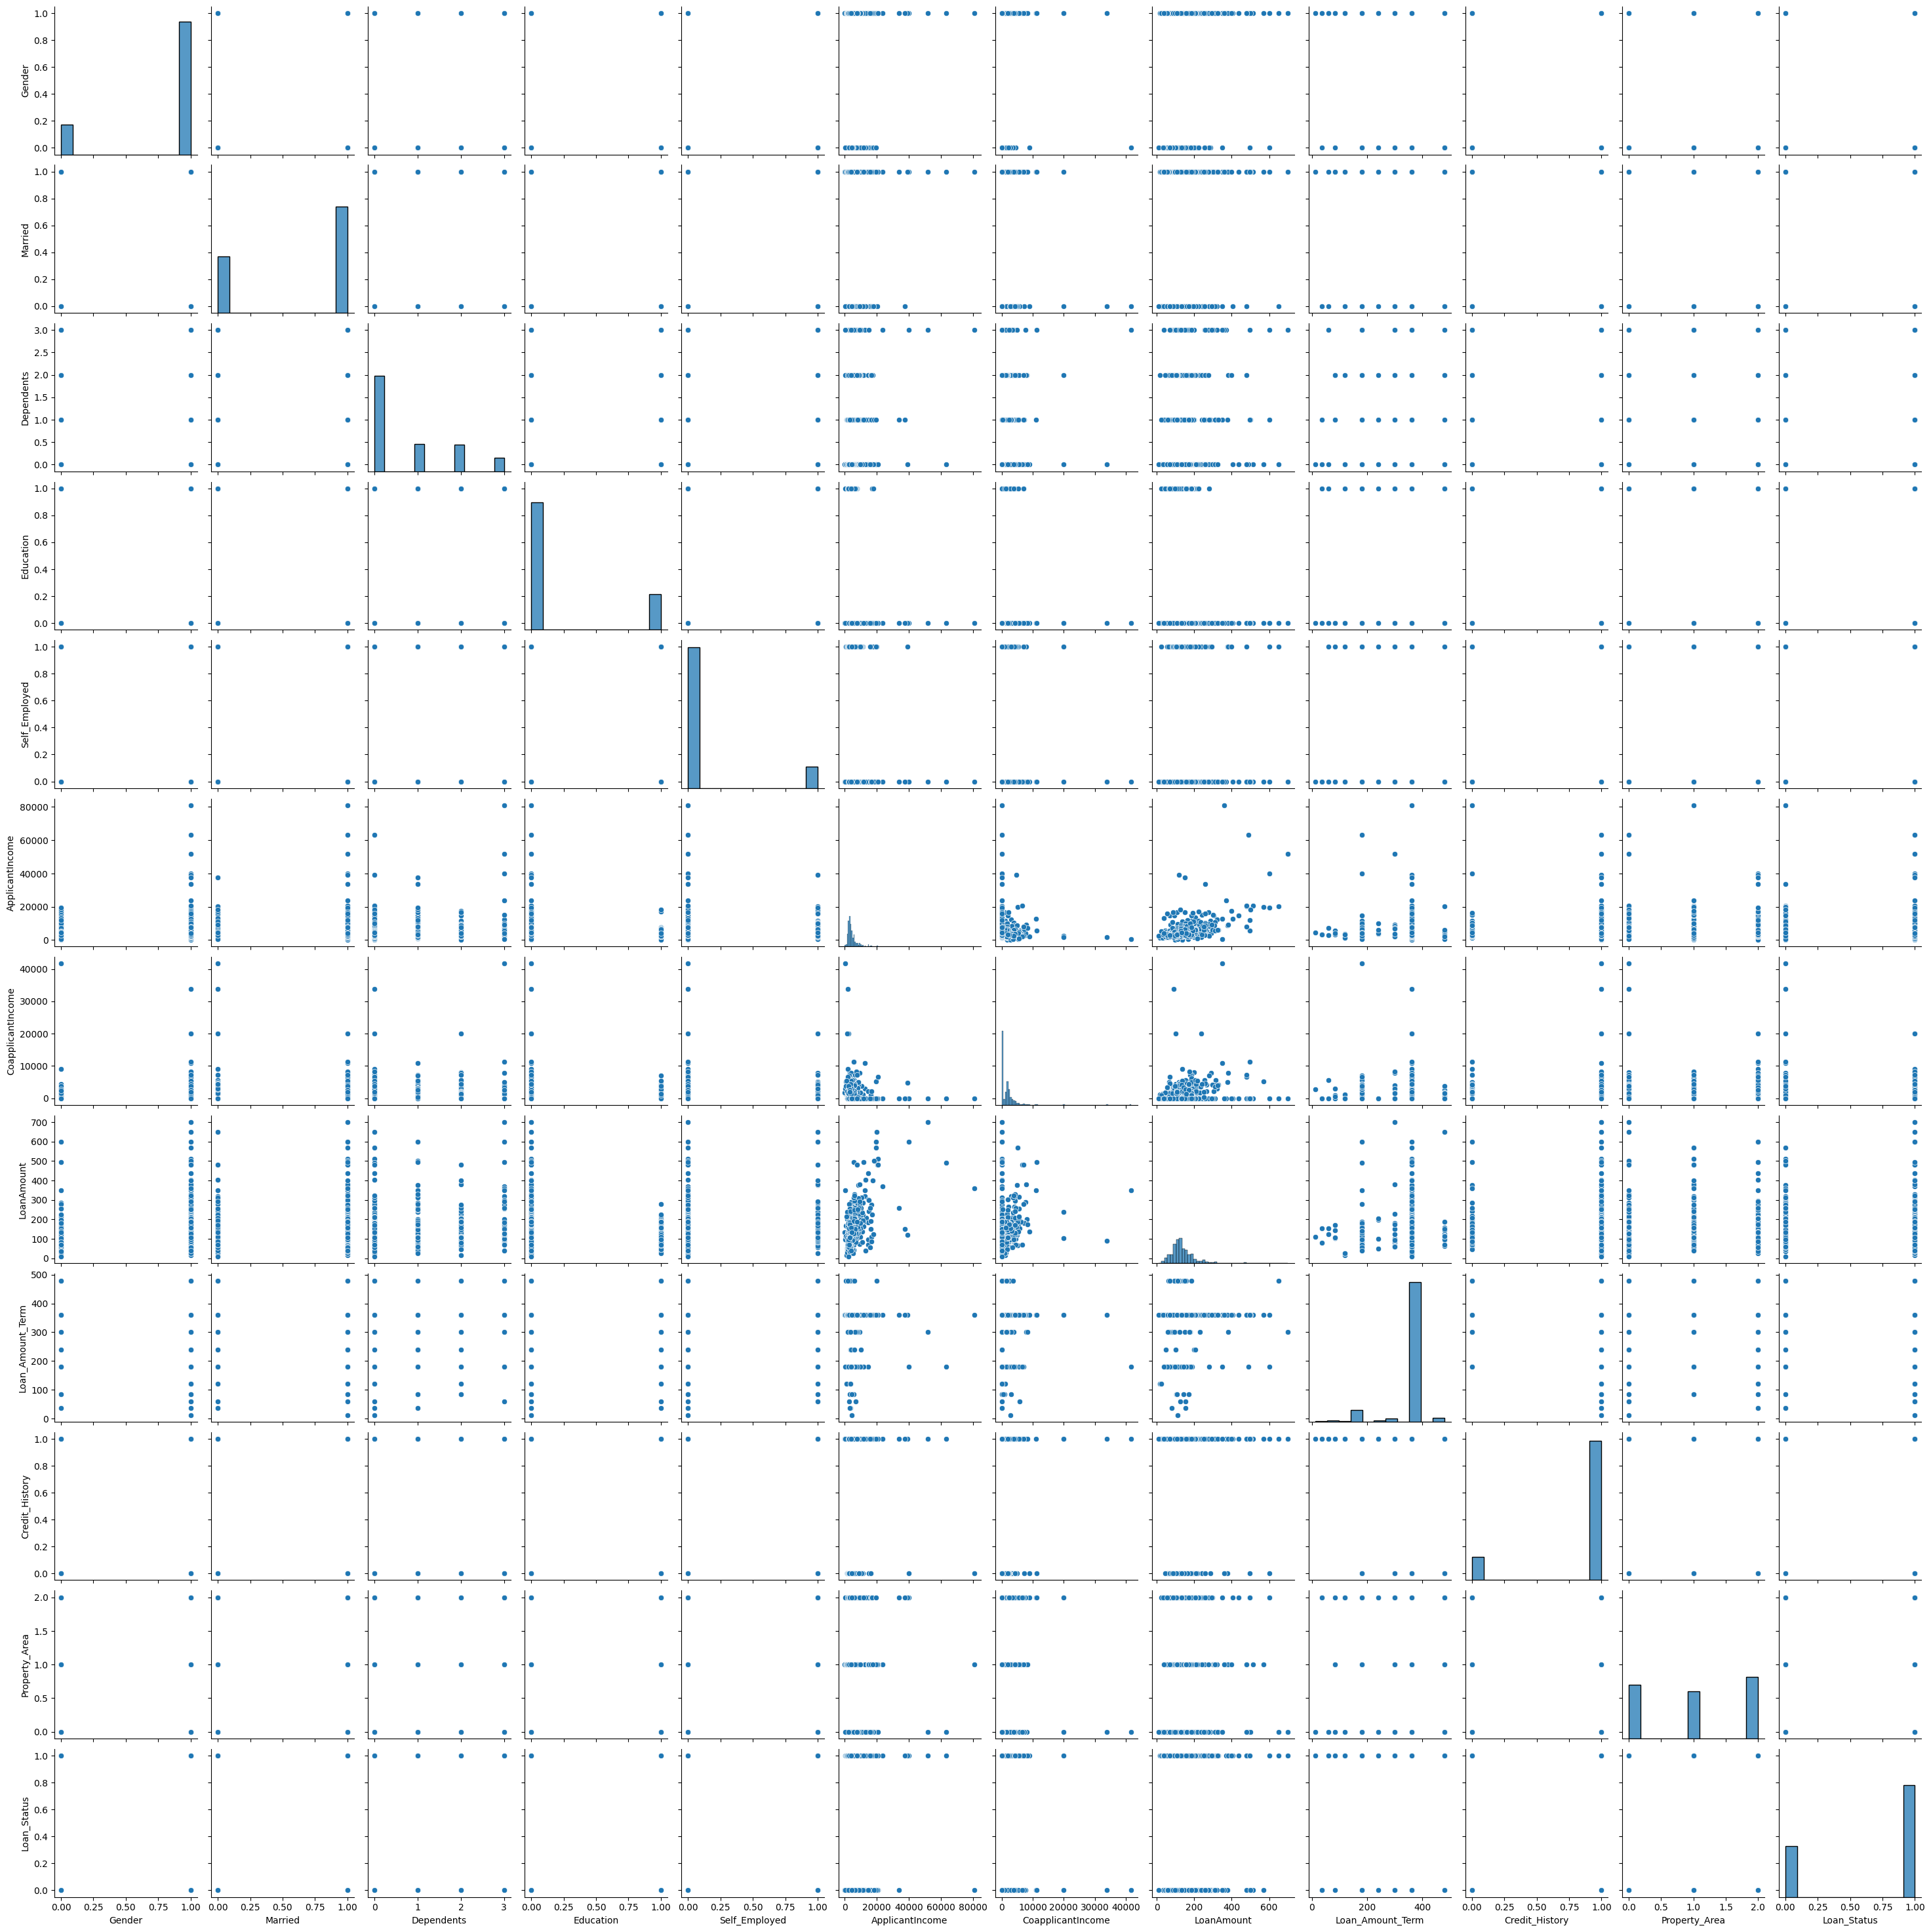

In [65]:
sns.pairplot(df_loan)

<Figure size 10000x10000 with 0 Axes>

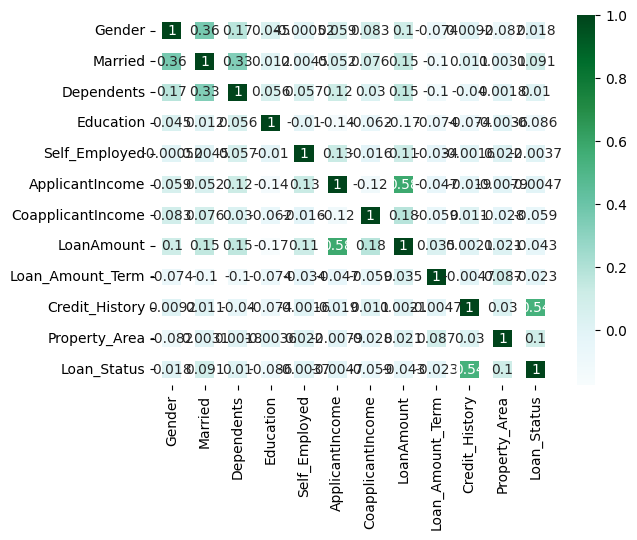

<Figure size 10000x10000 with 0 Axes>

In [66]:
sns.heatmap(correaltion,annot=True,cmap='BuGn',linewidths=10)
plt.figure(figsize=(100,100))

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_loan[["ApplicantIncome"]])
scaled2 = scaler.fit_transform(df_loan[["CoapplicantIncome"]])
scaled3 = scaler.fit_transform(df_loan[["LoanAmount"]])
scaled4 = scaler.fit_transform(df_loan[["Loan_Amount_Term"]])

In [86]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,134.76,360.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.00,360.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.00,360.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.00,360.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.00,360.0,1.0,0.0,1.0


In [87]:
x = df_loan.drop('Loan_Status',axis=1)
y = df_loan.Loan_Status

Text(0, 0.5, 'ApplicantIncome')

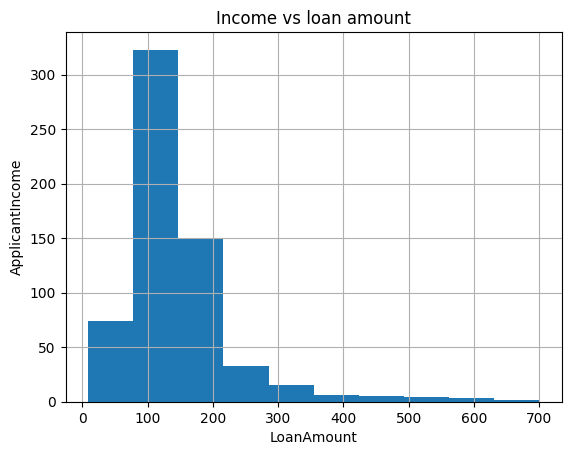

In [75]:
fig = df_loan.LoanAmount.hist(bins=10)
fig.set_title('Income vs loan amount')
fig.set_xlabel('LoanAmount')
fig.set_ylabel('ApplicantIncome')

Text(0, 0.5, 'Loan_Status')

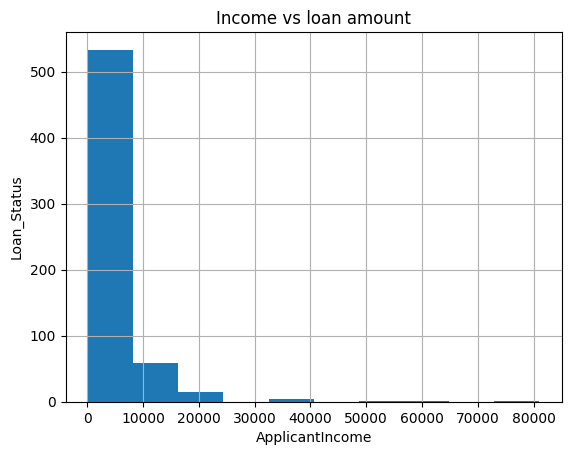

In [76]:
fig = df_loan.ApplicantIncome.hist(bins=10)
fig.set_title('Income vs loan amount')
fig.set_xlabel('ApplicantIncome')
fig.set_ylabel('Loan_Status')


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,1.0,0.0,0.0,0.0,0.0,2971.0,2791.0,144.0,360.0,1.0,2.0
281,1.0,1.0,0.0,0.0,0.0,3927.0,800.0,112.0,360.0,1.0,2.0
372,1.0,1.0,2.0,0.0,1.0,9323.0,7873.0,380.0,300.0,1.0,1.0
32,1.0,0.0,1.0,0.0,1.0,4692.0,0.0,106.0,360.0,1.0,1.0
204,1.0,1.0,2.0,1.0,0.0,3917.0,0.0,124.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,0.0,0.0,1.0,1.0,18165.0,0.0,125.0,360.0,1.0,0.0
584,1.0,1.0,1.0,0.0,0.0,2787.0,1917.0,146.0,360.0,0.0,1.0
493,0.0,0.0,0.0,1.0,1.0,17263.0,0.0,225.0,360.0,1.0,2.0
527,1.0,1.0,1.0,1.0,0.0,5285.0,1430.0,161.0,360.0,0.0,2.0


In [79]:
y_train

222    1.0
281    1.0
372    1.0
32     0.0
204    1.0
      ... 
534    1.0
584    0.0
493    1.0
527    1.0
168    0.0
Name: Loan_Status, Length: 491, dtype: float64

In [80]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
414,0.0,1.0,0.0,1.0,0.0,2149.0,3237.0,178.0,360.0,0.0,2.0
569,1.0,1.0,0.0,0.0,0.0,3166.0,2064.0,104.0,360.0,0.0,0.0
265,1.0,0.0,0.0,0.0,0.0,4095.0,3447.0,151.0,360.0,1.0,1.0
84,1.0,1.0,1.0,0.0,0.0,3988.0,0.0,50.0,240.0,1.0,0.0
109,1.0,1.0,3.0,1.0,0.0,2071.0,754.0,94.0,480.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
152,1.0,0.0,0.0,0.0,0.0,9166.0,0.0,244.0,360.0,1.0,0.0
589,1.0,1.0,2.0,0.0,1.0,2726.0,0.0,106.0,360.0,0.0,2.0
123,1.0,1.0,2.0,0.0,0.0,2957.0,0.0,81.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0


In [93]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [90]:
# scaling the data

In [127]:
from sklearn.preprocessing import StandardScaler
## Initiating the scalar
tr_scalar, ts_scalar= StandardScaler(),StandardScaler()

x_tr_sc,x_ts_sc=tr_scalar.fit_transform(x_train),ts_scalar.fit_transform(x_test)

x_tr_sc.shape,x_ts_sc.shape


((491, 11), (123, 11))

In [98]:
#@title Building the Ann

import tensorflow as tf


In [142]:
# instaning the model
loan_predication=tf.keras.Sequential()


In [152]:
# Adding the input layer
loan_predication.add(tf.keras.layers.Input(shape = (11,)))

# Adding the hidden layers > 3 > n = 6,12,6
loan_predication.add(tf.keras.layers.Dense(units = 6, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))   # > First hidden layer
loan_predication.add(tf.keras.layers.Dense(units = 12, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))   # > Second hidden layer
loan_predication.add(tf.keras.layers.Dense(units = 6, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))   # > Third hidden layer
loan_predication
# Adding the output layer
loan_predication.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [153]:
# Compiling the model
loan_predication.compile(optimizer = 'Adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy', 'Precision'])

In [154]:
# Summarizing the model
loan_predication.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 72        
                                                                 
 dense_25 (Dense)            (None, 12)                84        
                                                                 
 dense_26 (Dense)            (None, 6)                 78        
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
 input_8 (InputLayer)        multiple                  0         
                                                                 
 dense_28 (Dense)            (None, 6)                 12        
                                                                 
 dense_29 (Dense)            (None, 12)               

In [155]:
# training the model
history_object = loan_predication.fit(x = x_tr_sc,
                             y = y_train,
                             epochs = 100,
                             batch_size = 32,
                             validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 2s 28ms/step - loss: 1.0245 - accuracy: 0.3087 - precision: 0.0000e+00 - val_loss: 0.9835 - val_accuracy: 0.3232 - val_precision: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.9799 - accuracy: 0.3087 - precision: 0.0000e+00 - val_loss: 0.9427 - val_accuracy: 0.3232 - val_precision: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.9391 - accuracy: 0.3087 - precision: 0.0000e+00 - val_loss: 0.9053 - val_accuracy: 0.3232 - val_precision: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.9015 - accuracy: 0.3087 - precision: 0.0000e+00 - val_loss: 0.8709 - val_accuracy: 0.3232 - val_precision: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.8675 - accuracy: 0.3087 - precision: 0.0000e+00 - val_loss: 0.8401 - val_accuracy: 0.3232 - val_precision: 0.0000e+00
Epoch 6/100
13/13 [===============

In [156]:
threshold = 0.5
y_pred = loan_predication.predict(x_ts_sc)
y_pred = list(map(int,y_pred>threshold))

4/4 [==============================] - 0s 3ms/step


In [157]:
acc = accuracy_score(y_test,y_pred)
acc

0.6829268292682927

In [150]:
history_object.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

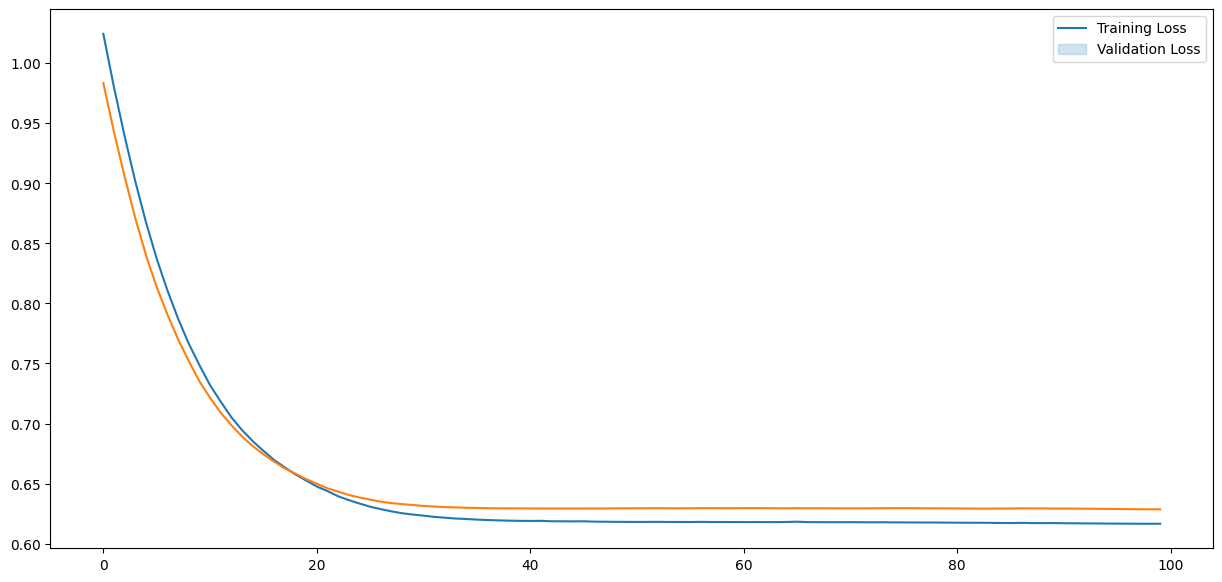

In [158]:
epochs = history_object.epoch
tr_loss = history_object.history.get('loss')
val_loss = history_object.history.get('val_loss')

plt.figure(figsize=(15,7))
sns.lineplot(x = epochs, y = tr_loss)
sns.lineplot(x = epochs, y = val_loss)
plt.legend(['Training Loss','Validation Loss'])
plt.show()

In [159]:
# Defining the hyper-model
def model_builder(hyp):
  # Instantiating the model
  model = tf.keras.Sequential()
  # Adding the input layer
  model.add(tf.keras.layers.Input(shape = (11,)))
  # Adding the hidden layers
  for hl in range(hyp.Int('number_of_layers', min_value=1, max_value = 10)):
    model.add(tf.keras.layers.Dense(units = hyp.Int(f'number_of_units_in_layer_{hl}',min_value = 6, max_value = 31, step = 6),
                                    activation = hyp.Choice(f'activation_function_for_layer_{hl}',['relu','sigmoid']),
                                    kernel_initializer = hyp.Choice(f'kernel_nitializer_for_layer_{hl}',['he_uniform','glorot_uniform'])))
  # Adding the output layer
  model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer='glorot_uniform'))
  # Compiling the model
  model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [164]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.6 MB/s eta 0:00:00


In [165]:
# Creating the tuner object
from keras_tuner.tuners import RandomSearch
tuner_obj = RandomSearch(hypermodel = model_builder,
                         objective = 'accuracy')

In [166]:
tuner_obj.search_space_summary()

Search space summary
Default search space size: 4
number_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
number_of_units_in_layer_0 (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 31, 'step': 6, 'sampling': 'linear'}
activation_function_for_layer_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
kernel_nitializer_for_layer_0 (Choice)
{'default': 'he_uniform', 'conditions': [], 'values': ['he_uniform', 'glorot_uniform'], 'ordered': False}


In [167]:
tuner_obj.search(x_tr_sc,y_train,epochs = 20,batch_size = 32)

Trial 10 Complete [00h 00m 03s]
accuracy: 0.6883910298347473

Best accuracy So Far: 0.837067186832428
Total elapsed time: 00h 00m 45s


In [ ]:
# Getting the best model configs
tuner_obj.results_summary()

In [171]:
'''Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 00 summary
Hyperparameters:
number_of_layers: 7
number_of_units_in_layer_0: 24
activation_function_for_layer_0: relu
kernel_nitializer_for_layer_0: he_uniform
number_of_units_in_layer_1: 6
activation_function_for_layer_1: relu
kernel_nitializer_for_layer_1: he_uniform
number_of_units_in_layer_2: 6
activation_function_for_layer_2: relu
kernel_nitializer_for_layer_2: he_uniform
number_of_units_in_layer_3: 6
activation_function_for_layer_3: relu
kernel_nitializer_for_layer_3: he_uniform
number_of_units_in_layer_4: 6
activation_function_for_layer_4: relu
kernel_nitializer_for_layer_4: he_uniform
number_of_units_in_layer_5: 6
activation_function_for_layer_5: relu
kernel_nitializer_for_layer_5: he_uniform
number_of_units_in_layer_6: 6
activation_function_for_layer_6: relu
kernel_nitializer_for_layer_6: he_uniform
Score: 0.837067186832428'''

'Results summary\nResults in ./untitled_project\nShowing 10 best trials\nObjective(name="accuracy", direction="max")\n\nTrial 00 summary\nHyperparameters:\nnumber_of_layers: 7\nnumber_of_units_in_layer_0: 24\nactivation_function_for_layer_0: relu\nkernel_nitializer_for_layer_0: he_uniform\nnumber_of_units_in_layer_1: 6\nactivation_function_for_layer_1: relu\nkernel_nitializer_for_layer_1: he_uniform\nnumber_of_units_in_layer_2: 6\nactivation_function_for_layer_2: relu\nkernel_nitializer_for_layer_2: he_uniform\nnumber_of_units_in_layer_3: 6\nactivation_function_for_layer_3: relu\nkernel_nitializer_for_layer_3: he_uniform\nnumber_of_units_in_layer_4: 6\nactivation_function_for_layer_4: relu\nkernel_nitializer_for_layer_4: he_uniform\nnumber_of_units_in_layer_5: 6\nactivation_function_for_layer_5: relu\nkernel_nitializer_for_layer_5: he_uniform\nnumber_of_units_in_layer_6: 6\nactivation_function_for_layer_6: relu\nkernel_nitializer_for_layer_6: he_uniform\nScore: 0.837067186832428'